<a href="https://colab.research.google.com/github/timescast/DL/blob/main/DL_Rice_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: xxcxz
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 529MB/s]

In [ ]:

import torch # Torch main framework
import torch.nn as nn # Used for getting the NN Layers
from torch.optim import Adam # Adam Optimizer
from torch.utils.data import Dataset, DataLoader # Dataset class and DataLoader for creatning the objects
from torchsummary import summary # Visualize the model layers and number of parameters
from sklearn.model_selection import train_test_split # Split the dataset (train, validation, test)
from sklearn.metrics import accuracy_score # Calculate the testing Accuracy
import matplotlib.pyplot as plt # Plotting the training progress at the end
import pandas as pd # Data reading and preprocessing
import numpy as np # Mathematical operations

In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")

In [ ]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace=True)

In [ ]:
data_df.drop(['id'],axis=1,inplace=True)

In [ ]:
orginal_df = data_df.copy()

Normalization

In [ ]:
for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

In [ ]:
X= np.array(data_df.iloc[:,:-1])
Y = np.array(data_df.iloc[:,-1])

In [ ]:
X_train , X_test , y_train ,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_test , X_val , y_test ,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [ ]:
class dataset(Dataset):
  def __init__(self,X,y):
    self.X = torch.tensor(X,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self, index):
    return self.X[index],self.y[index]

In [ ]:
trainig_data = dataset(X_train,y_train)
validation_data = dataset(X_val,y_val)
testing_data = dataset(X_test,y_test)

In [ ]:
trainig_dataloader=DataLoader(trainig_data,batch_size=8,shuffle=True)
validation_dataloader=DataLoader(validation_data,batch_size=8,shuffle=True)
testing_dataloader=DataLoader(testing_data,batch_size=8,shuffle=True)

In [ ]:
for x, y in trainig_dataloader:
  print(x)
  print("====")
  print(y)
  break

tensor([[0.7593, 0.8025, 0.8257, 0.9165, 0.7233, 0.8714, 0.6594, 0.6934, 0.8659,
         0.5514],
        [0.6713, 0.9505, 0.6214, 0.9885, 0.6400, 0.8193, 0.7887, 0.7510, 0.6527,
         0.8679],
        [0.5570, 0.7687, 0.6342, 0.9602, 0.5341, 0.7463, 0.6299, 0.6388, 0.7486,
         0.6876],
        [0.9099, 0.8875, 0.8895, 0.9229, 0.8588, 0.9539, 0.6754, 0.7585, 0.8674,
         0.5661],
        [0.5736, 0.8549, 0.5848, 0.9840, 0.5438, 0.7573, 0.5551, 0.6704, 0.7000,
         0.8294],
        [0.7816, 0.8139, 0.8458, 0.9140, 0.7525, 0.8841, 0.8219, 0.7119, 0.8459,
         0.5460],
        [0.8583, 0.8477, 0.8789, 0.9145, 0.8117, 0.9264, 0.6533, 0.7317, 0.8793,
         0.5472],
        [0.7031, 0.9196, 0.6653, 0.9779, 0.6628, 0.8385, 0.9438, 0.7349, 0.7140,
         0.7842]])
====
tensor([0., 1., 1., 0., 1., 0., 0., 1.])


In [ ]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__()
    self.input = nn.Linear(X.shape[1],HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS,1)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    x = self.input(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x
model = MyModel()


In [ ]:
summary = summary(model,input_size=(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr=0.001)

In [ ]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

epochs = 10
for epoc in range(epochs):
  total_loss_train = 0
  total_loss_val = 0
  total_acc_train = 0
  total_acc_val = 0

  for data in trainig_dataloader:
    input , labels = data
    prediction = model(input).squeeze(1)
    batch_loss = criterion(prediction,labels)
    total_loss_train += batch_loss.item()
    acc = (prediction.round()==labels).sum().item()
    total_acc_train += acc
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  with torch.no_grad():
    for data in validation_dataloader:
      input , labels = data
      prediction = model(input).squeeze(1)
      batch_loss = criterion(prediction,labels)
      total_loss_val += batch_loss.item()
      acc = (prediction.round()==labels).sum().item()
      total_acc_val += acc
  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_val_plot.append(round(total_loss_val/1000, 4))
  total_acc_train_plot.append(round(total_acc_train/(trainig_data.__len__())*100, 4))
  total_acc_val_plot.append(round(total_acc_val/(validation_data.__len__())*100, 4))

  print(f'''Epoch no. {epoc + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(trainig_data.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}''')
  print("="*50)


Epoch no. 1 Train Loss: 0.0654 Train Accuracy: 98.5938 Validation Loss: 0.0118 Validation Accuracy: 98.7170
Epoch no. 2 Train Loss: 0.0660 Train Accuracy: 98.6095 Validation Loss: 0.0122 Validation Accuracy: 98.7537
Epoch no. 3 Train Loss: 0.0650 Train Accuracy: 98.6252 Validation Loss: 0.0118 Validation Accuracy: 98.7903
Epoch no. 4 Train Loss: 0.0656 Train Accuracy: 98.6645 Validation Loss: 0.0168 Validation Accuracy: 98.4238
Epoch no. 5 Train Loss: 0.0653 Train Accuracy: 98.5702 Validation Loss: 0.0119 Validation Accuracy: 98.7903
Epoch no. 6 Train Loss: 0.0665 Train Accuracy: 98.6095 Validation Loss: 0.0145 Validation Accuracy: 98.4604
Epoch no. 7 Train Loss: 0.0658 Train Accuracy: 98.6095 Validation Loss: 0.0117 Validation Accuracy: 98.7903
Epoch no. 8 Train Loss: 0.0639 Train Accuracy: 98.6095 Validation Loss: 0.0158 Validation Accuracy: 98.1672
Epoch no. 9 Train Loss: 0.0647 Train Accuracy: 98.6802 Validation Loss: 0.0117 Validation Accuracy: 98.8270
Epoch no. 10 Train Loss: 0.0

In [ ]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion((prediction), labels)
    total_loss_test += batch_loss_test.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print(f"Accuracy Score is: {round((total_acc_test/X_test.shape[0])*100, 2)}%")

Accuracy Score is: 98.53%


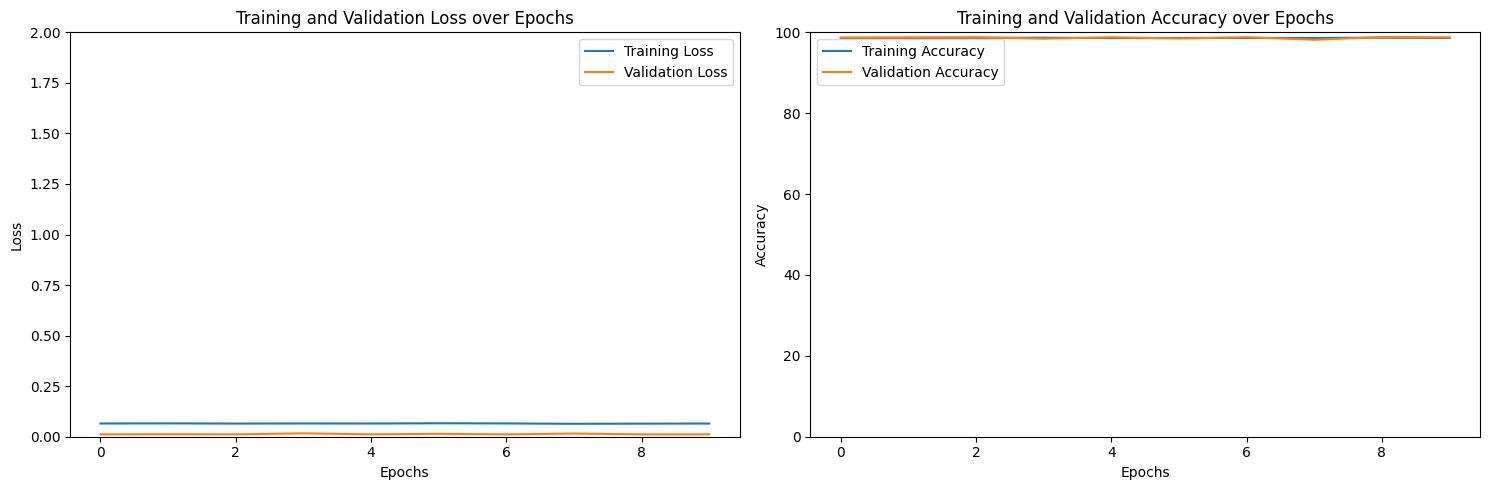

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_val_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_val_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.tight_layout()

plt.show()